In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob #import các file
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [5]:
!pip install tqdm

In [6]:
import gc

In [7]:
paths = glob('./Names_1/*.txt')
li_df=[]
for path in paths:
    df = pd.read_csv(path, names=['name','gender','occurence'])
    df['year'] = path[-8:-4]
    li_df.append(df)
    
df = pd.concat(li_df, ignore_index=True)
del li_df
gc.collect()

0

In [9]:
df = df.set_index('year').reset_index()
gc.collect()

22

In [10]:
df.head(2)

,year,name,gender,occurence
0,1880,Mary,F,7065
1,1880,Anna,F,2604


#### Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

In [11]:
df.groupby(['gender','year']).occurence.sum()

gender  year
F       1880      90994
        1881      91953
        1882     107847
        1883     112319
        1884     129019
                 ...   
M       2014    1916564
        2015    1911537
        2016    1891585
        2017    1842837
        2018    1800392
Name: occurence, Length: 278, dtype: int64

In [ ]:
# Chuyển sang dạng df:
df.groupby(['gender','year']).occurence.sum().to_frame()
or df.groupby(['gender','year']).sum()

In [12]:
# MultiIndex:
df.groupby(['gender','year']).sum()

occurence
gender year           
F      1880      90994
       1881      91953
       1882     107847
       1883     112319
       1884     129019
...                ...
M      2014    1916564
       2015    1911537
       2016    1891585
       2017    1842837
       2018    1800392

[278 rows x 1 columns]

In [13]:
df.groupby(['gender','year']).sum().reset_index()

,gender,year,occurence
0,F,1880,90994
1,F,1881,91953
2,F,1882,107847
3,F,1883,112319
4,F,1884,129019
...,...,...,...
273,M,2014,1916564
274,M,2015,1911537
275,M,2016,1891585
276,M,2017,1842837


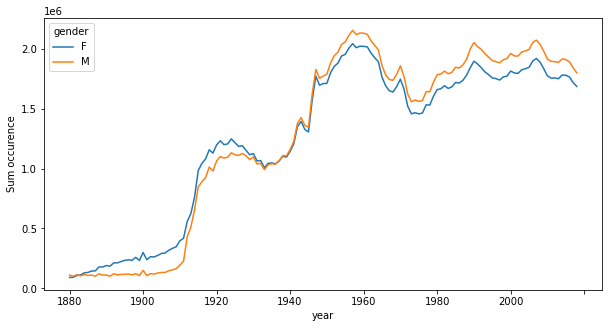

In [16]:
# vô hiệu hóa MultiIndex (đưa lên values)
df.groupby(['gender','year']).sum().reset_index().\
pivot(index='year',columns='gender',values='occurence').\
plot(figsize=(10,5), ylabel='Sum occurence');

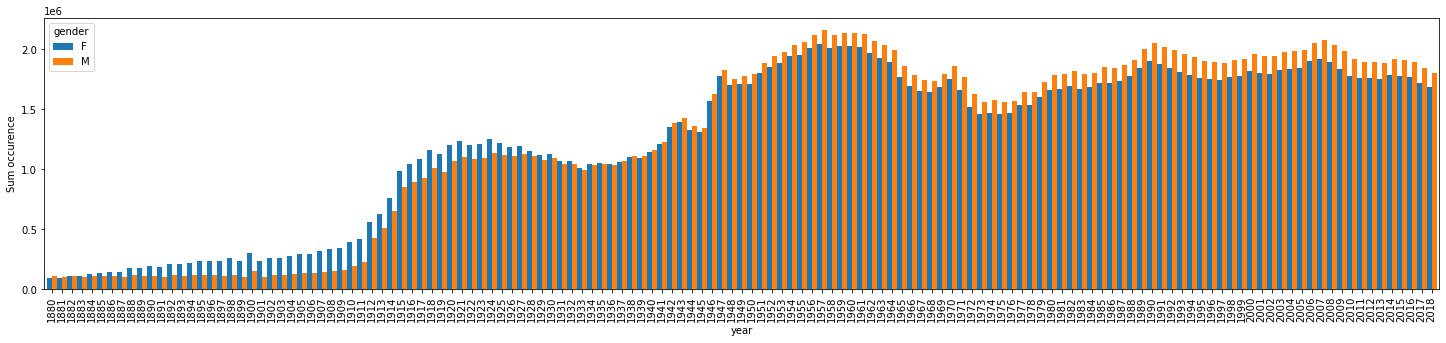

In [19]:
# dạng bar:
df.groupby(['gender','year']).sum().reset_index().\
pivot(index='year',columns='gender',values='occurence').\
plot(kind='bar',figsize=(25,5), ylabel='Sum occurence',width=1);

In [22]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

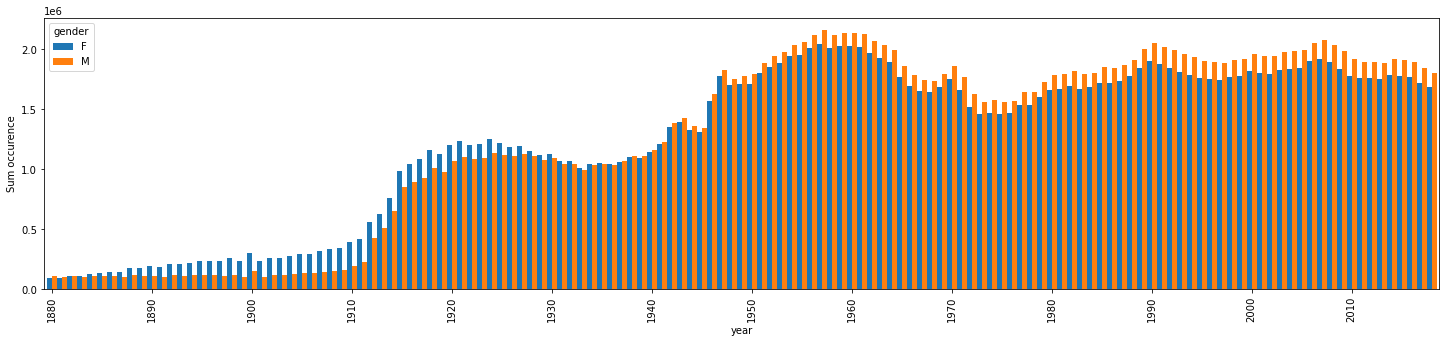

In [23]:
# Sửa dấu tick:
ax = df.groupby(['gender','year']).sum().reset_index().\
    pivot(index='year',columns='gender',values='occurence').\
    plot(kind='bar',figsize=(25,5), ylabel='Sum occurence',width=1)
ax.xaxis.set_major_locator(MultipleLocator(10));

#### Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [27]:
df.groupby(['year','gender']).apply(lambda x: x.nlargest(1000,'occurence'))[['name','occurence']]

name  occurence
year gender                              
1880 F      0             Mary       7065
            1             Anna       2604
            2             Emma       2003
            3        Elizabeth       1939
            4           Minnie       1746
...                        ...        ...
2018 M      1944037     Korbyn        207
            1944038    Randall        207
            1944039     Benton        206
            1944040    Coleman        206
            1944041     Markus        206

[277877 rows x 2 columns]

In [28]:
df.groupby(['year','gender']).apply(lambda x: x.nlargest(1000,'occurence',keep='all'))[['name','occurence']].\
droplevel(2)

name  occurence
year gender                      
1880 F            Mary       7065
     F            Anna       2604
     F            Emma       2003
     F       Elizabeth       1939
     F          Minnie       1746
...                ...        ...
2018 M          Korbyn        207
     M         Randall        207
     M          Benton        206
     M         Coleman        206
     M          Markus        206

[281378 rows x 2 columns]

In [29]:
data_name=df.set_index('name')
data_name.groupby(['year','gender']).occurence.nlargest(1000, keep = 'all').reset_index()

,year,gender,name,occurence
0,1880,F,Mary,7065
1,1880,F,Anna,2604
2,1880,F,Emma,2003
3,1880,F,Elizabeth,1939
4,1880,F,Minnie,1746
...,...,...,...,...
281373,2018,M,Korbyn,207
281374,2018,M,Randall,207
281375,2018,M,Benton,206
281376,2018,M,Coleman,206


### 4. Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

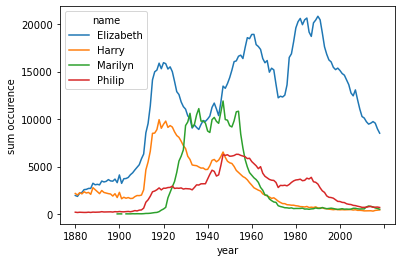

In [36]:
df_4 = df[df.name.isin (['Philip', 'Harry', 'Elizabeth', 'Marilyn'])]
df_4.pivot_table(values='occurence', index = 'year', columns='name',aggfunc='sum').\
plot(ylabel='sum occurence');

<AxesSubplot:xlabel='year'>

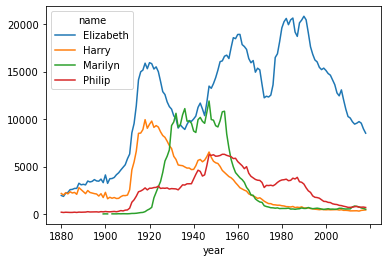

In [37]:
names = ['Philip','Harry','Elizabeth','Marilyn']
df.query('name in @names').groupby(['year','name']).sum().reset_index().\
pivot(index='year',columns='name',values='occurence').plot()

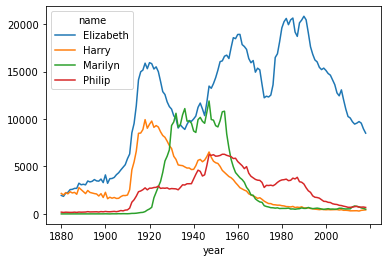

In [39]:
names = ['Philip','Harry','Elizabeth','Marilyn']
df.query('name in @names').groupby(['year','name']).sum().reset_index().\
pivot(index='year',columns='name',values='occurence').fillna(0).plot();

#### Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [65]:
top_1000=df.groupby(['year','gender']).apply(lambda x: x.nlargest(1000,'occurence',keep='all'))[['name','occurence']].\
droplevel(2).reset_index().groupby(['year','gender']).occurence.sum()

all_df=df.groupby(['year','gender']).occurence.sum()

In [70]:
top_1000

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1584754
2017  F         1274098
      M         1536814
2018  F         1251608
      M         1493831
Name: occurence, Length: 278, dtype: int64

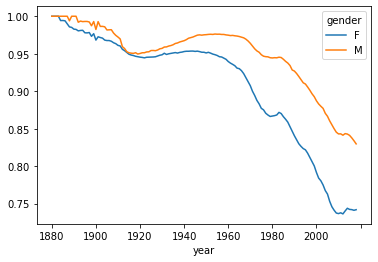

In [68]:
(top_1000 / all_df).to_frame().reset_index().pivot(index='year', columns='gender',values='occurence').plot();

#### Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [71]:
years = ['1900', '1960', '2018']
df_3_years = df.query('year in @years')
df_3_years.head(2)

,year,name,gender,occurence
52265,1900,Mary,F,16706
52266,1900,Helen,F,6343


In [72]:
df_3_years['first_letter'] = df_3_years.name.apply(lambda x: x[0])
df_3_years

C:\Users\Laptop EDG\anaconda3\envs\quynh\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,name,gender,occurence,first_letter
52265,1900,Mary,F,16706,M
52266,1900,Helen,F,6343,H
52267,1900,Anna,F,6114,A
52268,1900,Margaret,F,5304,M
52269,1900,Ruth,F,4765,R
...,...,...,...,...,...
1957041,2018,Zylas,M,5,Z
1957042,2018,Zyran,M,5,Z
1957043,2018,Zyrie,M,5,Z
1957044,2018,Zyron,M,5,Z


In [ ]:
male_df=df_3_years.query('gender="M"').groupby('first_letter').occurence.sum()
female_df=df_3_years.query('gender="F"').groupby('first_letter').occurence.sum()

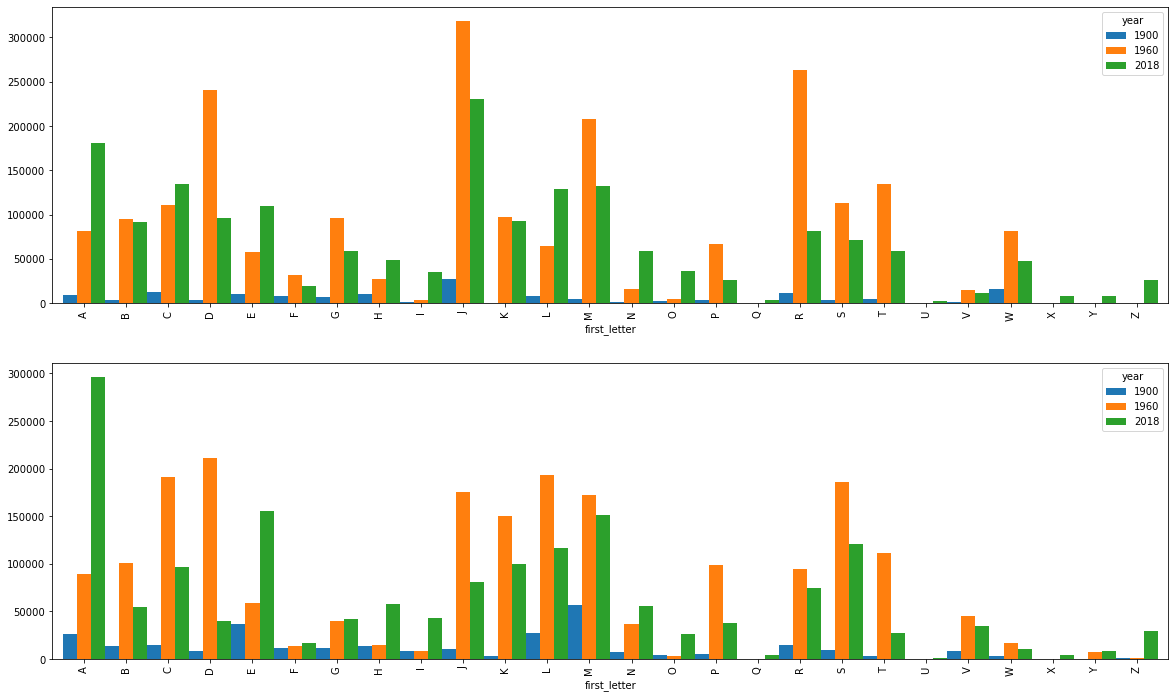

In [77]:
gender_df=df_3_years.groupby(['year','gender','first_letter']).occurence.sum().to_frame().reset_index()
male_df = gender_df.query('gender == "M"')
female_df = gender_df.query('gender == "F"')

fig,ax = plt.subplots(2,1,figsize = (20,12))
male_df.pivot(index='first_letter',columns='year', values='occurence').plot(kind='bar',ax=ax[0],width=1)
female_df.pivot(index='first_letter',columns='year', values='occurence').plot(kind='bar',ax=ax[1],width=1);

#### Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [78]:
male_df = df.query('gender == "M"')
female_df = df.query('gender == "F"')

male_to_female = male_df.query('name in @female_df.name')
female_to_male = female_df.query('name in @male_df.name')

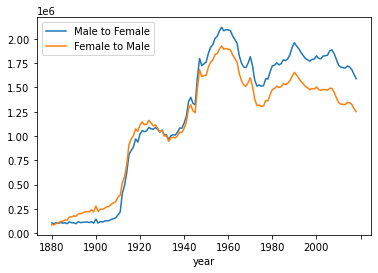

In [82]:
male_to_female.groupby('year').occurence.sum().plot(label='Male to Female')
female_to_male.groupby('year').occurence.sum().plot(label='Female to Male')
plt.legend();

In [83]:
floor = 0

In [84]:
floor

0

In [140]:
def is_win():
    
    floor = 0
    num_up = 0
    
    while (num_up <= 100) and (floor < 60):
        
        if np.random.uniform() < 0.001:
            floor = 0
        dice = np.random.randint(1, 7)
        
        if dice <= 2:
            floor = max(0, floor-1)
        elif 2 < dice <=5:
            floor += 1
            num_up += 1
        else:
            floor += np.random.randint(1,7)
            num_up += 1
                  
    return floor >= 60

In [141]:
is_win()

True

In [142]:
num_plays = 10000
results = []
for _ in range(num_plays):
    results.append(is_win())
    
sum(results)/num_plays

0.9853